Your Name: Kieran Fitzmaurice

The electric field near a thin, charged rod with one side positive and the other negative can be calculated using integration.

First, let's draw the rod in units where the length of the rod is 2. You can reuse this code once your calculation of the electric field is complete.

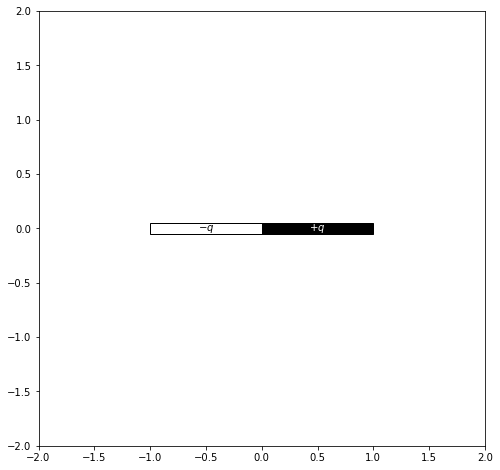

In [1]:
import matplotlib.pyplot as plt

def draw_bar():
    Lbar = plt.Rectangle((-1,-0.05), 1, 0.1, ec="black", fc="white")
    Rbar = plt.Rectangle((0,-0.05), 1, 0.1, ec="black", fc="black")
    ax = plt.gca()
    ax.add_patch(Lbar)
    ax.add_patch(Rbar)
    plt.text(-0.5, 0, "$-q$", color="black", ha="center", va="center")
    plt.text(0.5, 0, "$+q$", color="white", ha="center", va="center")

#usage
plt.figure(figsize=(8,8))
draw_bar()
plt.axis(xmin=-2, xmax=2, ymin=-2, ymax=2)
plt.show()

Since the electric field $\vec{E}$ is a vector, we need to find both it's $x$ and $y$-components (we'll ignore the $z$-component, so that we can make a 2-D image). These components are found using Coulomb's law.
$$dE_x=k\frac{dq}{r^2}\cos\theta\quad\mbox{and}\quad dE_y=k\frac{dq}{r^2}\sin\theta\,,$$
where $k$ is the electrostatic constant, $\vec{r}$ is the position vector of the point where we want to know the electric field, and $\theta$ is the angle between $\vec{r}$ and the $x$-axis. The standard change of variables is to let $dq=\lambda\,ds$. In our case, we'll choose values such that
$$k\lambda = \pm 1\,.$$
We find
$$E_x=-\int_{-1}^0\frac{x-s}{\big[y^2+(x-s)^2\big]^{3/2}}\,ds + \int_0^1\frac{x-s}{\big[y^2+(x-s)^2\big]^{3/2}}ds$$
and
$$E_y=-\int_{-1}^0\frac{y}{\big[y^2+(x-s)^2\big]^{3/2}}\,ds + \int_0^1\frac{y}{\big[y^2+(x-s)^2\big]^{3/2}}ds\,,$$
where the first term of each electric field component is from the left-hand side of the rod (where $k\lambda = -1$) and the second term is from the right-hand side (where $k\lambda = +1$).

While these integrals can be evaluated analytically, let's use them to practice with numerical integration.

- Create a $20\times20$ grid, and calculate $E_x$ and $E_y$ for each location on this grid. Choose a suitable integrator to use for this purpose.
- Use `imshow` to plot the logarithm of the **magnitude** of the electric field. Make sure it looks reasonable. Choose a suitable color map.
- Use `quiver` to plot the **direction** of the electric field on top of your previous plot. When plotting direction, you want the length of each vector to be 1. Choose a suitable color.
- To complete the figure, draw the rod itself on top of everything else (using the code supplied above).

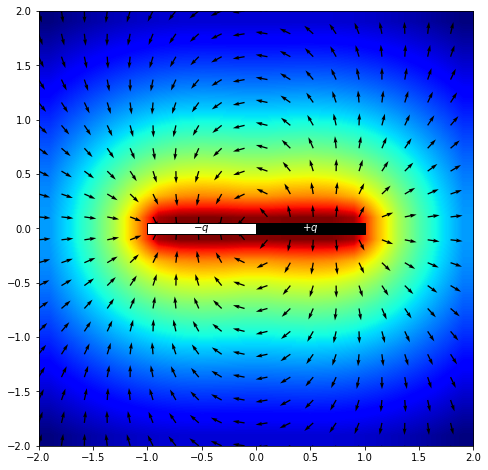

In [2]:
import numpy as np
import scipy.integrate as si

L = 20

x = np.linspace(-2,2,L)
y = np.linspace(-2,2,L)
xx,yy = np.meshgrid(x,y)

@np.vectorize
def func_x(x,y,s):
    E = (x-s)/(y**2 + (x-s)**2)**1.5
    return(E)

@np.vectorize
def func_y(x,y,s):
    E = y/(y**2 + (x-s)**2)**1.5
    return(E)

k = 7
n = 2**k + 1

ss_1 = np.zeros((n,L,L))
ss_2 = np.zeros((n,L,L))

fx1 = np.zeros((n,L,L))
fx2 = np.zeros((n,L,L))
fy1 = np.zeros((n,L,L))
fy2 = np.zeros((n,L,L))

s1 = np.linspace(-1,0,n)
s2 = np.linspace(0,1,n)

for i,s in enumerate(s1):
    fx1[i] = -1*func_x(xx,yy,s)
    fy1[i] = -1*func_y(xx,yy,s)

for i,s in enumerate(s2):
    fx2[i] = func_x(xx,yy,s)
    fy2[i] = func_y(xx,yy,s)

# x and y components of electric field
Ex = si.romb(fx1,dx = 1/n, axis = 0) + si.romb(fx2,dx = 1/n, axis = 0)
Ey = si.romb(fy1,dx = 1/n, axis = 0) + si.romb(fy2,dx = 1/n, axis = 0)

# magnitude of electric field
Mag = np.sqrt(Ex**2 + Ey**2) 

vx = Ex/Mag
vy = Ey/Mag

LogMag = np.log(Mag)

plt.figure(figsize=(8,8))

plt.imshow(LogMag,cmap = "jet", interpolation = "bilinear", extent = (-2,2,-2,2))
plt.quiver(xx,yy,vx,vy)

draw_bar()
plt.axis(xmin=-2, xmax=2, ymin=-2, ymax=2)

plt.show()